In [1]:
import numpy as np
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import xarray as xr

import sys
sys.path.append("/Users/gliu/Downloads/02_Research/01_Projects/01_AMV/00_Commons/03_Scripts/")
sys.path.append("/Users/gliu/Downloads/02_Research/01_Projects/01_AMV/02_stochmod/03_Scripts/stochmod/model/")
import scm
from amv import proc,viz
projpath   = "/Users/gliu/Downloads/02_Research/01_Projects/01_AMV/02_stochmod/"
rawpath    = projpath + '01_Data/model_input/'
datpath2   = projpath + '01_Data/model_output/'
figpath    = projpath + '02_Figures/20230519/'

In [2]:
# Set paths to the masks
datpath = "/Users/gliu/Downloads/02_Research/01_Projects/01_AMV/02_stochmod/01_Data/"
fn1 = datpath + "CESM-FULL_landicemask360.npy"
fn2 = datpath + "CESM-SLAB_landicemask360.npy"
fn3 = datpath + "model_input/landicemask_enssum.npy"

In [3]:
# Load the Masks
picfull = np.load(fn1)
picslab = np.load(fn2)
htrfull = np.load(fn3)

In [10]:
# Load lat/lon
lon180,lat  = scm.load_latlon(rawpath)
lon360,_    = scm.load_latlon(rawpath,lon360=True)
lonr        = np.load(datpath2+"lon.npy")
latr        = np.load(datpath2+"lat.npy")

bbox_spg = [-80,0,30,75]

(<matplotlib.collections.QuadMesh at 0x7fe452dd9690>,
 <matplotlib.colorbar.Colorbar at 0x7fe452dd9900>)

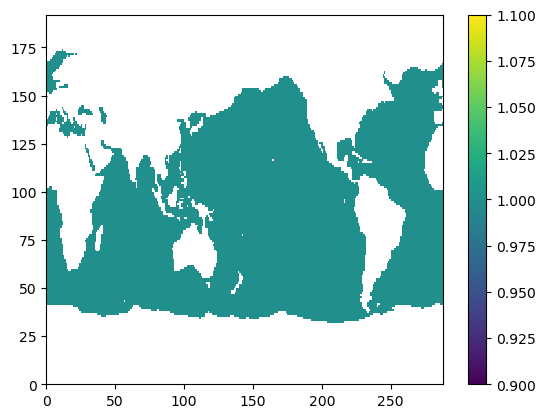

In [5]:
plt.pcolormesh(picfull),plt.colorbar()

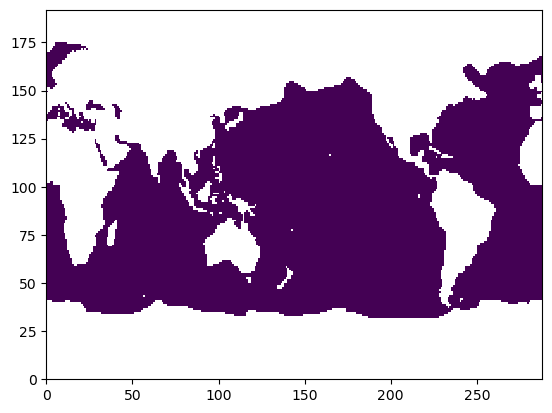

In [6]:
plt.pcolormesh(picslab)

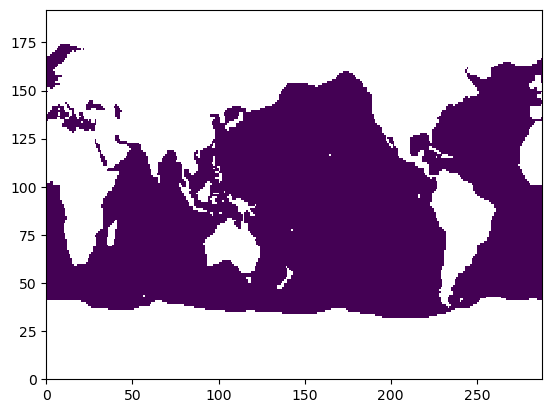

In [7]:
plt.pcolormesh(htrfull)

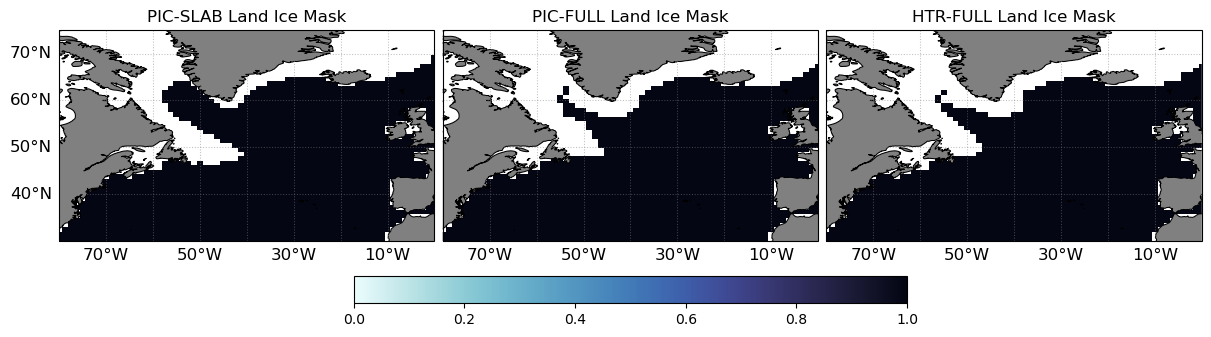

In [8]:
# Do a plot with all 3

masks = [picslab,picfull,htrfull]
names = ["PIC-SLAB","PIC-FULL","HTR-FULL"]

bbox_spg = [-80,0,30,75]

fig,axs = plt.subplots(1,3,constrained_layout=True,figsize=(12,12),
                       subplot_kw={'projection':ccrs.PlateCarree()})

for ii in range(3):
    
    ax = axs[ii]
    blabel=[0,0,0,1]
    if ii == 0:
        blabel[0] = 1
    pcm = ax.pcolormesh(lon360,lat,masks[ii],vmin=0,vmax=1,cmap="cmo.ice_r")
    ax.set_title(names[ii] + " Land Ice Mask")
    ax.set_extent([-80,0,20,65])
    viz.add_coast_grid(ax,bbox=bbox_spg,fill_color="gray",blabels=blabel)
fig.colorbar(pcm,ax=axs.flatten(),orientation='horizontal',fraction=0.025,pad=0.01)
savename = "%sLand_Ice_Mask_Comparison.png" % figpath
plt.savefig(savename,dpi=150,bbox_inches="tight")


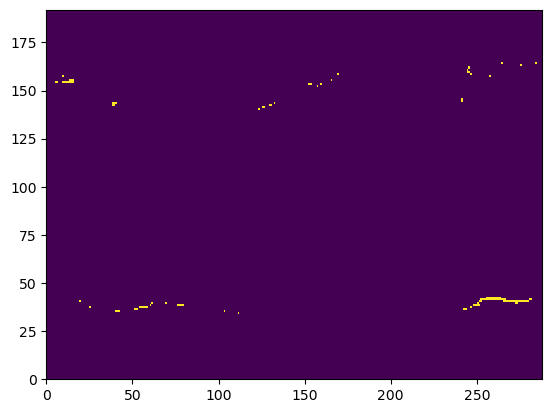

In [9]:
plt.pcolormesh(np.isnan(htrfull) & ~np.isnan(picfull))

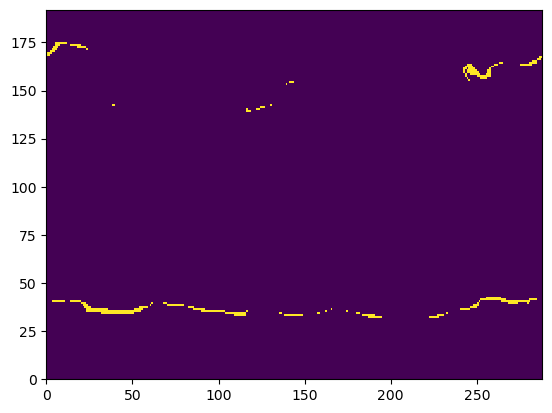

In [10]:
plt.pcolormesh(np.isnan(htrfull) & ~np.isnan(picslab))

In [11]:
_,msk180 = proc.lon360to180(lon360,htrfull.T)

In [12]:
pacific_mask = msk180.copy()

[[-100   20]
 [ -70    8]]


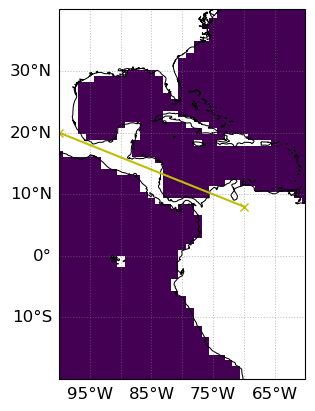

In [13]:
# Draw a line, Try to identify the cutoff points

ptstart = [-100,20]
ptend   = [-70,8]
pts     = np.vstack([ptstart,ptend])
print(pts)

bboxplot = [-100,-60,-20,40] # Simulation Box
fig,ax = plt.subplots(1,1,subplot_kw={'projection':ccrs.PlateCarree()})

ax = viz.add_coast_grid(ax=ax,bbox=bboxplot)
pcm = ax.pcolormesh(lon180,lat,pacific_mask[:,:].T)


#ax.scatter([-70],[5],100,marker="x",color="y")
ax.plot(pts[:,0],pts[:,1],color="y",marker="x") 
#ax.plot([-100,-70],pts[1,:],color="y",marker="x") 

NameError: name 'mskreg' is not defined

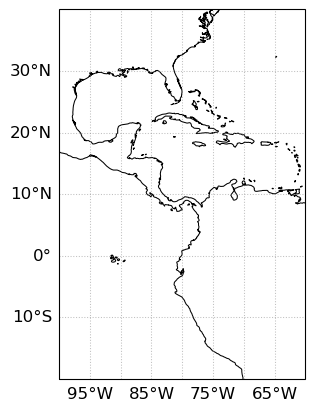

In [14]:
bboxplot = [-100,-60,-20,40] # Simulation Box
fig,ax = plt.subplots(1,1,subplot_kw={'projection':ccrs.PlateCarree()})

ax = viz.add_coast_grid(ax=ax,bbox=bboxplot)
pcm = ax.pcolormesh(lonr,latr,mskreg[:,:].T)

In [15]:

xstart,ystart = proc.find_latlon(ptstart[0],ptstart[1],lon180,lat)
xend,yend     = proc.find_latlon(ptend[0],ptend[1],lon180,lat)

dx = (ptend[0]-ptstart[0])/ np.abs((xend-xstart))
dy = (ptend[1]-ptstart[1])/ np.abs((xend-xstart)) # Abs() for decreasing values

dx,dy

Closest lon to -100.00 was -100.00
Closest lat to 20.00 was 20.26
Closest lon to -70.00 was -70.00
Closest lat to 8.00 was 8.01


(1.25, -0.5)

In [24]:
# Move through the line and set points to nan
pmfix = pacific_mask.copy()

x0 = ptstart[0]
y0 = ptstart[1]
kx = xstart

for i in range(xend-xstart):

    print("Location is %i Lon, eliminating Lat smaller than %i" % (x0,y0))
    kremove = np.where(lat <= y0)
    pmfix[kx,kremove] = np.nan
    print("Removed %i points" % (len(kremove)))
    
    kx += 1
    y0 += dy
    x0 += dx
    


    
    
    
    
    

NameError: name 'pacific_mask' is not defined

In [23]:
ptstart

NameError: name 'ptstart' is not defined

In [289]:
# Draw a line, Try to identify the cutoff points


# print(pts)

# bboxplot = [-100,-50,-20,-70] # Simulation Box
# fig,ax = plt.subplots(1,1,subplot_kw={'projection':ccrs.PlateCarree()})

# ax = viz.add_coast_grid(ax=ax,bbox=bboxplot)
# pcm = ax.pcolormesh(lon180,lat,pmfix[:,:].T)

# #ax.scatter([-70],[5],100,marker="x",color="y")
# ax.plot(pts[:,0],pts[:,1],color="y",marker="x") 
# #ax.plot([-100,-70],pts[1,:],color="y",marker="x") 

## Make into a function

Closest lon to -100.00 was -100.00
Closest lat to 20.00 was 20.26
Closest lon to -70.00 was -70.00
Closest lat to 8.00 was 8.01
Location is -100 Lon, eliminating 1 points with Lat less than 20
Location is -98 Lon, eliminating 1 points with Lat less than 19
Location is -97 Lon, eliminating 1 points with Lat less than 19
Location is -96 Lon, eliminating 1 points with Lat less than 18
Location is -95 Lon, eliminating 1 points with Lat less than 18
Location is -93 Lon, eliminating 1 points with Lat less than 17
Location is -92 Lon, eliminating 1 points with Lat less than 17
Location is -91 Lon, eliminating 1 points with Lat less than 16
Location is -90 Lon, eliminating 1 points with Lat less than 16
Location is -88 Lon, eliminating 1 points with Lat less than 15
Location is -87 Lon, eliminating 1 points with Lat less than 15
Location is -86 Lon, eliminating 1 points with Lat less than 14
Location is -85 Lon, eliminating 1 points with Lat less than 14
Location is -83 Lon, eliminating 1 poin

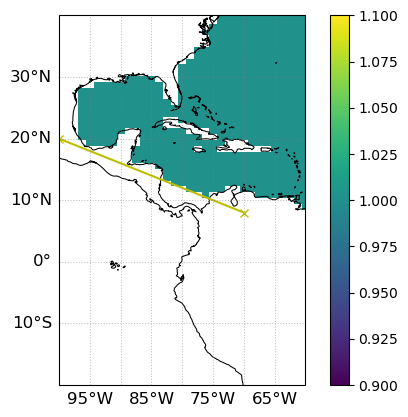

In [17]:
def linear_crop(invar,lat,lon,ptstart,ptend,belowline=True,along_x=True,debug=False,bbox=[-180,180,-90,90]):
    
    """
    invar [lon x lat]
    """
    
    # Get the indices for starting and ending points
    xstart,ystart = proc.find_latlon(ptstart[0],ptstart[1],lon180,lat)
    xend,yend     = proc.find_latlon(ptend[0],ptend[1],lon180,lat)
    
    # Copy variable
    pmfix = invar.copy()
    
    # Starting X,Y for loop
    x0 = ptstart[0] 
    y0 = ptstart[1]
        
    # Moving zonally, cut out points
    if along_x:
        
        # Calculate the dx and dy moving zonally
        dx = (ptend[0]-ptstart[0])/ np.abs((xend-xstart))
        dy = (ptend[1]-ptstart[1])/ np.abs((xend-xstart)) # Abs() for decreasing values
        
        # Starting index for loop
        kx = xstart
        for i in range(np.abs(xend-xstart)):
            if belowline:
                kremove = np.where(lat <= y0)
                word = "less"
            else: # Remove points above the line
                kremove = np.where(lat >= y0)
                word = "greater"
            pmfix[kx,kremove] = np.nan
            if debug:
                print("Location is %i Lon, eliminating %i points with Lat %s than %i" % (x0,len(kremove),word,y0))
            # Add to Index
            kx += (1*np.sign(xend-xstart))
            y0 += dy
            x0 += dx
    else: # Move meridionally
        
        # Calculate the dx or dy moving meridionally
        dx = (ptend[0]-ptstart[0])/ np.abs((yend-ystart))
        dy = (ptend[1]-ptstart[1])/ np.abs((yend-ystart)) # Abs() for decreasing values
        print(dx,dy)
        # Starting X,y, and y-index
        ky = ystart
        
        for i in range(np.abs(yend-ystart)):
            
            if belowline:
                kremove = np.where(lon <= x0)
                word = "less"
            else: # Remove points above the line
                kremove = np.where(lon >= x0)
                word = "greater"
            
            pmfix[kremove,ky] = np.nan
            if debug:
                print("Location is %i Lat, eliminating %i points with Lon %s than %i" % (y0,len(kremove),word,x0))
            
            # Add to Index
            ky += (1*np.sign(yend-ystart))
            y0 += dy
            x0 += dx
            
    if debug: # Make a plot
        pts     = np.vstack([ptstart,ptend])
        fig,ax = plt.subplots(1,1,subplot_kw={'projection':ccrs.PlateCarree()})
        ax = viz.add_coast_grid(ax=ax,bbox=bboxplot)
        pcm = ax.pcolormesh(lon,lat,pmfix[:,:].T)
        ax.plot(pts[:,0],pts[:,1],color="y",marker="x") 
        fig.colorbar(pcm,ax=ax)
        
    return pmfix



pmfix = linear_crop(msk180,lat,lon180,ptstart,ptend,belowline=True,along_x=True,debug=True,bbox=bboxplot)
    

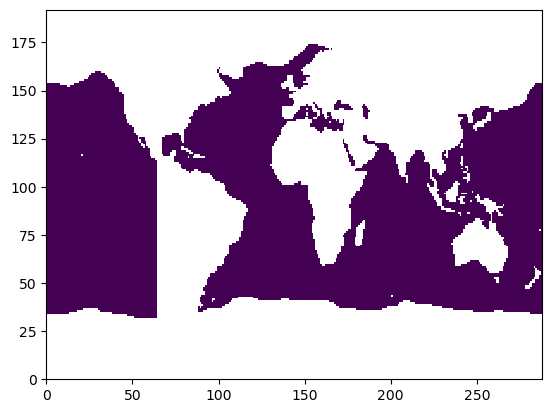

In [18]:
plt.pcolormesh(pmfix.T)


Closest lon to -100.00 was -100.00
Closest lat to 20.00 was 20.26
Closest lon to -70.00 was -70.00
Closest lat to 8.00 was 8.01
Location is -100 Lon, eliminating 1 points with Lat less than 20
Location is -98 Lon, eliminating 1 points with Lat less than 19
Location is -97 Lon, eliminating 1 points with Lat less than 19
Location is -96 Lon, eliminating 1 points with Lat less than 18
Location is -95 Lon, eliminating 1 points with Lat less than 18
Location is -93 Lon, eliminating 1 points with Lat less than 17
Location is -92 Lon, eliminating 1 points with Lat less than 17
Location is -91 Lon, eliminating 1 points with Lat less than 16
Location is -90 Lon, eliminating 1 points with Lat less than 16
Location is -88 Lon, eliminating 1 points with Lat less than 15
Location is -87 Lon, eliminating 1 points with Lat less than 15
Location is -86 Lon, eliminating 1 points with Lat less than 14
Location is -85 Lon, eliminating 1 points with Lat less than 14
Location is -83 Lon, eliminating 1 poin

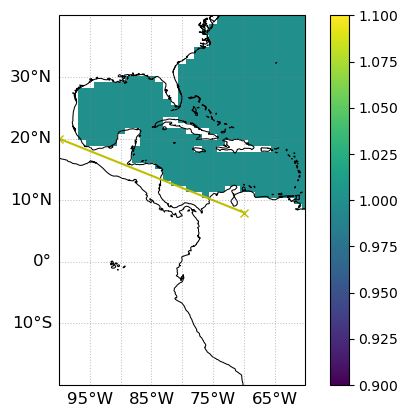

In [19]:
allmask = picfull*picslab*htrfull
#plt.pcolormesh(allmask)

_,msk180 = proc.lon360to180(lon360,allmask.T)
pmfix    = linear_crop(msk180,lat,lon180,ptstart,ptend,belowline=True,along_x=True,debug=True)

In [20]:
savename = datpath + "pacific_limask_180global.npy"
np.save(savename,pmfix)

## PIC Ice Mask Comparisons

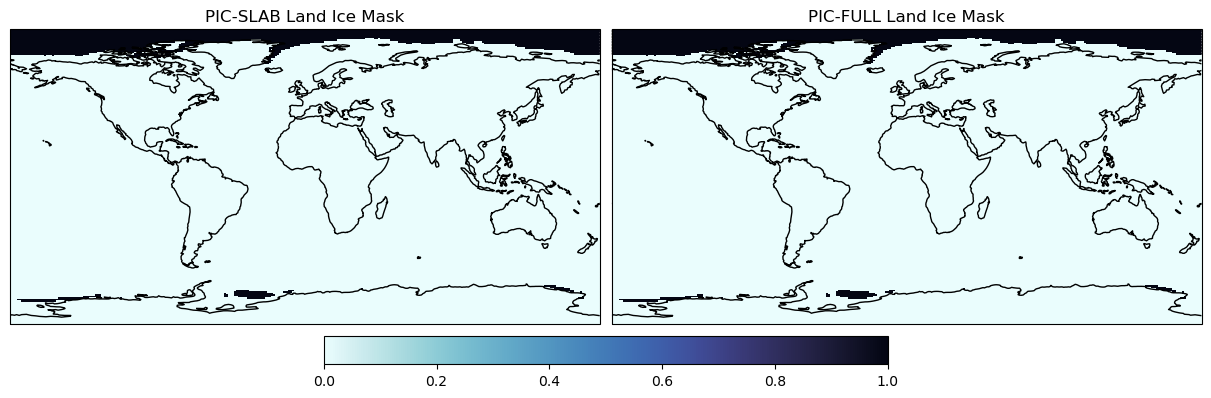

In [22]:
datpath1 = "/Users/gliu/Downloads/02_Research/01_Projects/01_AMV/02_stochmod/01_Data/scrap/"


slabm = np.load(datpath1 + "slab_mask_test.npy")
fullm = np.load(datpath1 + "full_mask_test.npy")

mmasks = [slabm,fullm]

fig,axs = plt.subplots(1,2,constrained_layout=True,figsize=(12,12),
                       subplot_kw={'projection':ccrs.PlateCarree()})

for ii in range(2):
    
    ax = axs[ii]
    blabel=[0,0,0,1]
    if ii == 0:
        blabel[0] = 1
    pcm = ax.pcolormesh(lon360,lat,mmasks[ii],vmin=0,vmax=1,cmap="cmo.ice_r")
    ax.set_title(names[ii] + " Land Ice Mask")
    #ax.set_extent([-80,0,20,78])
    #viz.add_coast_grid(ax,bbox=bbox_spg,fill_color="gray",blabels=blabel)
    ax.coastlines()
fig.colorbar(pcm,ax=axs.flatten(),orientation='horizontal',fraction=0.025,pad=0.01)
savename = "%sLand_Ice_Mask_Comparison_Bool.png" % figpath
plt.savefig(savename,dpi=150,bbox_inches="tight")


In [23]:
# Load the actual ice fractions

datpathnc = "/Users/gliu/Downloads/02_Research/01_Projects/01_AMV/02_stochmod/01_Data/CESM_proc/"
dsslab = xr.open_dataset(datpathnc+"ICEFRAC_PIC_SLAB.nc").load()
dsfull = xr.open_dataset(datpathnc+"ICEFRAC_PIC_FULL.nc").load()
                         


/Users/gliu/opt/anaconda3/envs/mlenv/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:1614: UserWarning: No contour levels were found within the data range.
  result = super().contour(*args, **kwargs)
/Users/gliu/opt/anaconda3/envs/mlenv/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:1614: UserWarning: No contour levels were found within the data range.
  result = super().contour(*args, **kwargs)


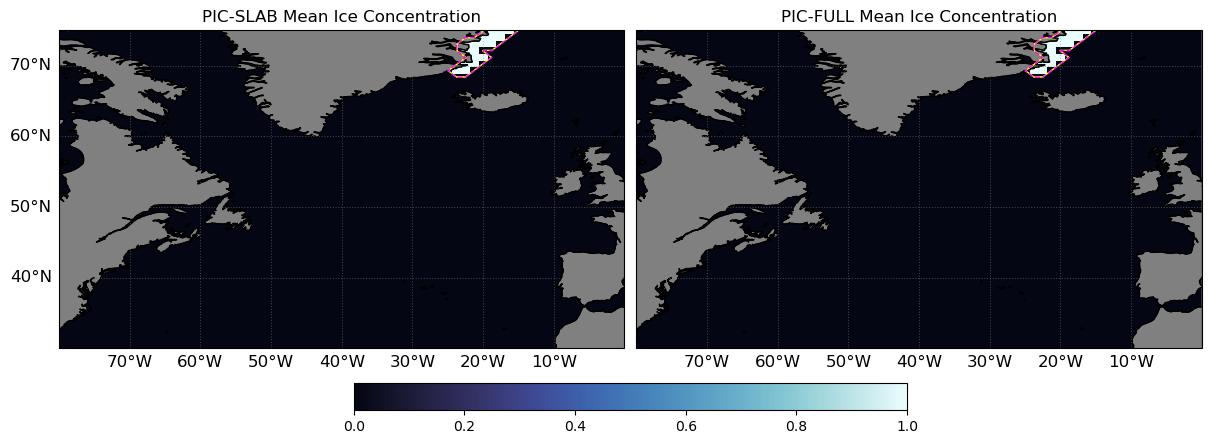

In [24]:



mmasks  = [dsslab,dsfull]
mmasks2 = [slabm,fullm]



fig,axs = plt.subplots(1,2,constrained_layout=True,figsize=(12,12),
                       subplot_kw={'projection':ccrs.PlateCarree()})

for ii in range(2):
    
    ax = axs[ii]
    blabel=[0,0,0,1]
    if ii == 0:
        blabel[0] = 1
    plotvar = mmasks[ii].ICEFRAC.mean('time')
    plotvar = (mmasks[ii].ICEFRAC >=0.05).prod('time')
    
    pcm = ax.pcolormesh(lon360,lat,plotvar,vmin=0,vmax=1,cmap="cmo.ice")
    cl = ax.contour(lon360,lat,plotvar,levels=[0.05,0.06],colors="yellow",linewidths=0.75)
    z3c2 = ax.contour(lon360,lat,mmasks2[ii],levels=[1,],colors="magenta",linewidths=0.99,linestyles="dashed")
    ax.set_title(names[ii] + " Mean Ice Concentration")
    ax.set_extent([-80,0,20,78])
    viz.add_coast_grid(ax,bbox=bbox_spg,fill_color="gray",blabels=blabel)
    ax.coastlines()
fig.colorbar(pcm,ax=axs.flatten(),orientation='horizontal',fraction=0.025,pad=0.01)
savename = "%sLand_Ice_Mask_Concentration.png" % figpath
plt.savefig(savename,dpi=150,bbox_inches="tight")

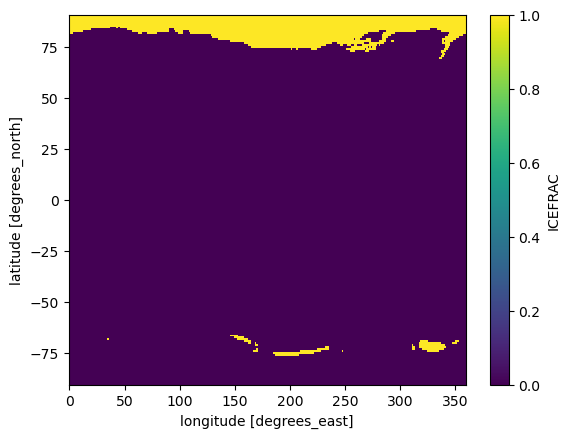

In [25]:
(mmasks[ii].ICEFRAC >=0.05).prod('time').plot()

## Check CESM1-LENS Ice Masking 

Using output processed by [predict_amv/preprocessing/merge_cesm1_atm.py


In [7]:
maskpath = "/Users/gliu/Downloads/02_Research/01_Projects/04_Predict_AMV/03_Scripts/CESM_data/Masks/"


In [14]:
# Load masks


masks_lens_ds = []
masknames_lens = ("icemask","landmask","limask")
masknames_ds   = ("ICEMASK","LANDMASK","MASK")
for m,mn in enumerate(masknames_lens):
    ds = xr.open_dataset("%sCESM1LE_HTR_%s_allens.nc" % (maskpath,mn))
    print(ds)
    masks_lens_ds.append(ds)
masks_lens = [masks_lens_ds[m][masknames_ds[m]].values for m in range(len(masknames_lens))]

<xarray.Dataset>
Dimensions:  (time: 42, lat: 192, lon: 288)
Coordinates:
  * time     (time) int64 1 2 3 4 5 6 7 8 9 10 ... 33 34 35 36 37 38 39 40 41 42
  * lat      (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
Data variables:
    ICEMASK  (time, lat, lon) float64 ...
<xarray.Dataset>
Dimensions:   (time: 42, lat: 192, lon: 288)
Coordinates:
  * time      (time) int64 1 2 3 4 5 6 7 8 9 10 ... 34 35 36 37 38 39 40 41 42
  * lat       (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * lon       (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
Data variables:
    LANDMASK  (time, lat, lon) float64 ...
<xarray.Dataset>
Dimensions:  (time: 42, lat: 192, lon: 288)
Coordinates:
  * time     (time) int64 1 2 3 4 5 6 7 8 9 10 ... 33 34 35 36 37 38 39 40 41 42
  * lat      (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float64

(<matplotlib.collections.QuadMesh at 0x7fe4902f5f00>,
 <matplotlib.colorbar.Colorbar at 0x7fe4902f6410>)

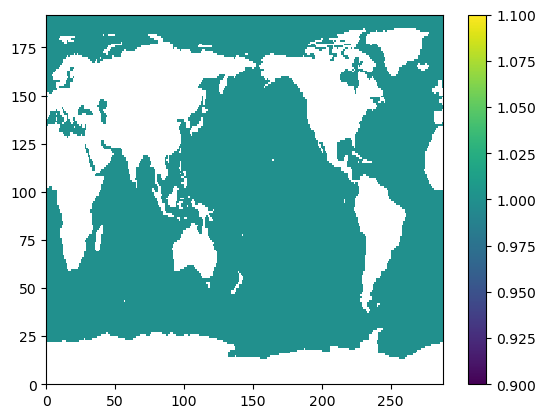

In [15]:
plt.pcolormesh(masks_lens[2].prod(0)),plt.colorbar()

### Visualize the mask

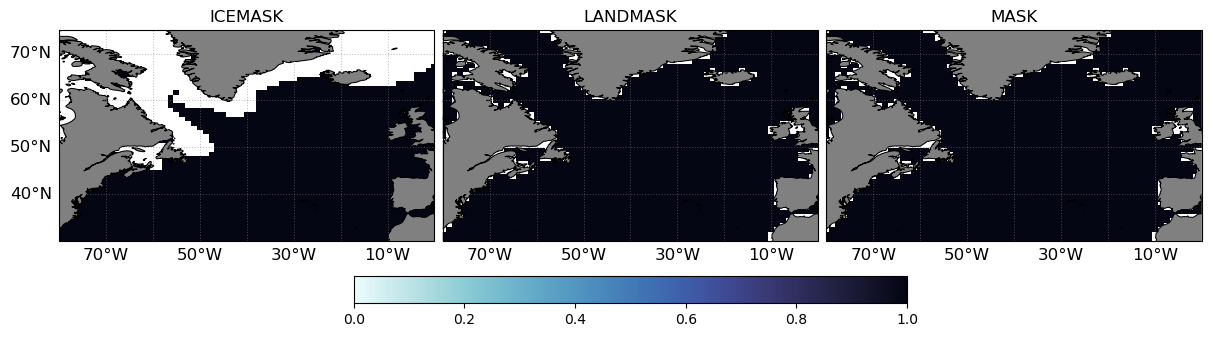

In [16]:
# Do a plot with all 3

masks = [ms.prod(0) for ms in masks_lens]
names = masknames_ds

bbox_spg = [-80,0,30,75]

fig,axs = plt.subplots(1,3,constrained_layout=True,figsize=(12,12),
                       subplot_kw={'projection':ccrs.PlateCarree()})

for ii in range(3):
    
    ax = axs[ii]
    blabel=[0,0,0,1]
    if ii == 0:
        blabel[0] = 1
    pcm = ax.pcolormesh(lon360,lat,masks[ii],vmin=0,vmax=1,cmap="cmo.ice_r")
    ax.set_title(names[ii])
    ax.set_extent([-80,0,20,65])
    viz.add_coast_grid(ax,bbox=bbox_spg,fill_color="gray",blabels=blabel)
fig.colorbar(pcm,ax=axs.flatten(),orientation='horizontal',fraction=0.025,pad=0.01)
savename = "%sLand_Ice_Mask_Comparison_CESM1_HTR_ENSSUM.png" % figpath
plt.savefig(savename,dpi=150,bbox_inches="tight")


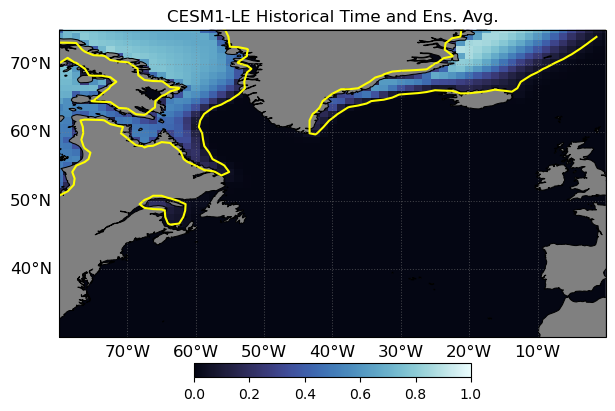

In [11]:
# Look at the mean ice concentration
ds_mean = xr.open_dataset(maskpath+"CESM1LE_HTR_ICEFRAC_mean.nc")

# Plot the mean ice concentration across members
fig,ax = plt.subplots(1,1,constrained_layout=True,figsize=(12,4),
                       subplot_kw={'projection':ccrs.PlateCarree()})
blabel=[1,0,0,1]
pcm = ax.pcolormesh(lon360,lat,ds_mean.mean('time').ICEFRAC,vmin=0,vmax=1,cmap="cmo.ice")
ax.contour(lon360,lat,ds_mean.mean('time').ICEFRAC,levels=[.05],colors="yellow")
ax.set_title("CESM1-LE Historical Time and Ens. Avg.")
ax.set_extent([-80,0,20,65])
viz.add_coast_grid(ax,bbox=bbox_spg,fill_color="gray",blabels=blabel)
fig.colorbar(pcm,ax=ax,orientation='horizontal',fraction=0.045,pad=0.01)
savename = "%sIceFraction_EnsMean_CESM1_HTR_ENSSUM.png" % figpath
plt.savefig(savename,dpi=150,bbox_inches="tight")

# for i in range(42):
#     fig,ax=plt.subplots(1,1)
#     ds_mean.isel(time=i).ICEFRAC.plot(ax=ax),plt.title("ens %02i"%(i+1))

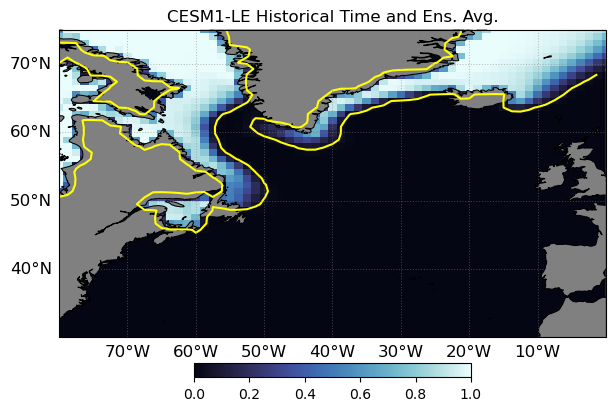

In [12]:
# Look at the mean ice concentration
ds_mean = xr.open_dataset(maskpath+"CESM1LE_HTR_ICEFRAC_max.nc")

# Plot the mean ice concentration across members
fig,ax = plt.subplots(1,1,constrained_layout=True,figsize=(12,4),
                       subplot_kw={'projection':ccrs.PlateCarree()})
blabel=[1,0,0,1]
pcm = ax.pcolormesh(lon360,lat,ds_mean.mean('time').ICEFRAC,vmin=0,vmax=1,cmap="cmo.ice")
ax.contour(lon360,lat,ds_mean.mean('time').ICEFRAC,levels=[.05],colors="yellow")
ax.set_title("CESM1-LE Historical Time and Ens. Avg.")
ax.set_extent([-80,0,20,65])
viz.add_coast_grid(ax,bbox=bbox_spg,fill_color="gray",blabels=blabel)
fig.colorbar(pcm,ax=ax,orientation='horizontal',fraction=0.045,pad=0.01)
savename = "%sIceFraction_EnsMax_CESM1_HTR_ENSSUM.png" % figpath
plt.savefig(savename,dpi=150,bbox_inches="tight")

# for i in range(42):
#     fig,ax=plt.subplots(1,1)
#     ds_mean.isel(time=i).ICEFRAC.plot(ax=ax),plt.title("ens %02i"%(i+1))

In [17]:
# Look at individual ensemble members

def plot_icefrac(ds_mean,ax):
    pcm = ax.pcolormesh(lon360,lat,ds_mean.mean('time').ICEFRAC,vmin=0,vmax=1,cmap="cmo.ice")
    ax.contour(lon360,lat,ds_mean.mean('time').ICEFRAC,levels=[.05],colors="yellow")
    ax.set_title("CESM1-LE Historical Time and Ens. Avg.")
    ax.set_extent([-80,0,20,65])
    viz.add_coast_grid(ax,bbox=bbox_spg,fill_color="gray",blabels=blabel)
    return ax



    

/var/folders/yv/4x0h1d8j4hx2w0dfzk8r_0zr0000gn/T/ipykernel_30653/3171490675.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig,ax = plt.subplots(1,1,constrained_layout=True,figsize=(12,4),


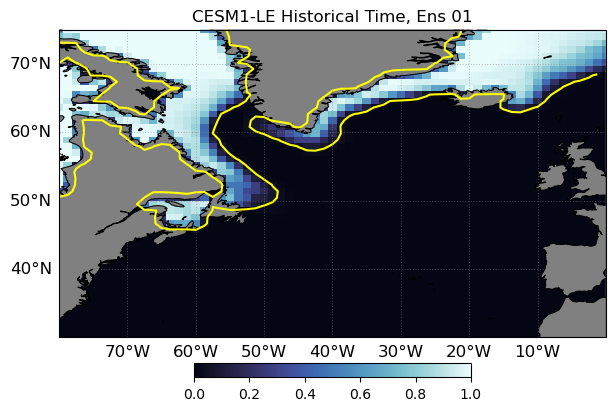

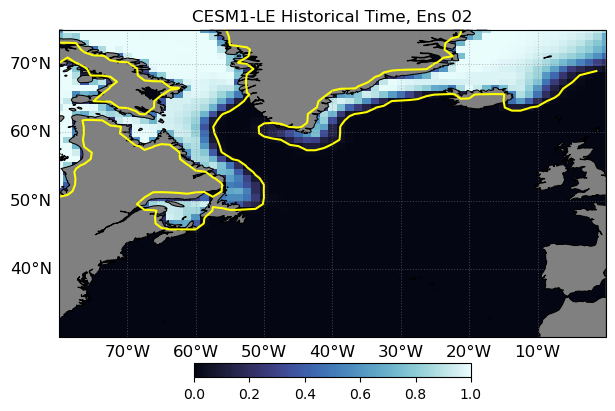

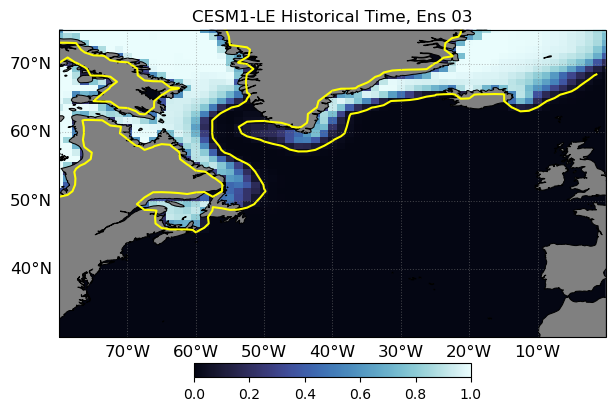

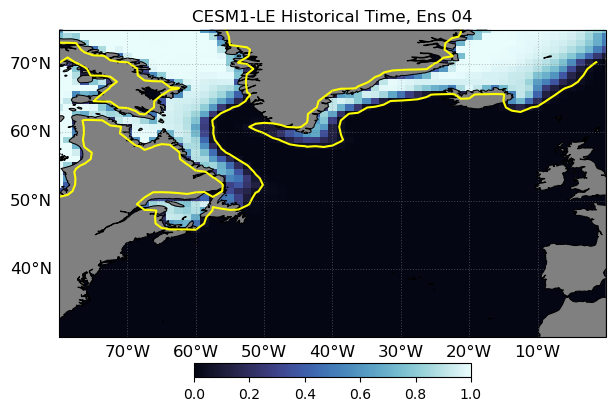

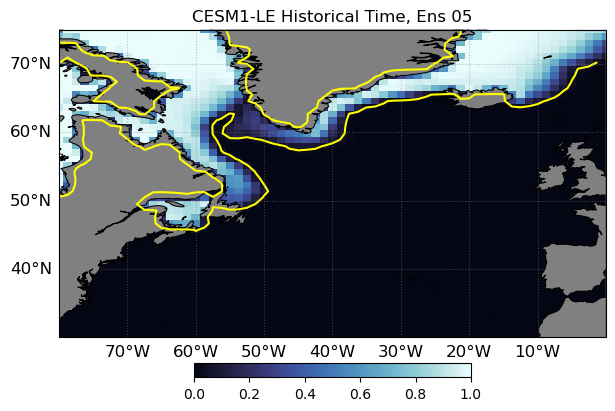

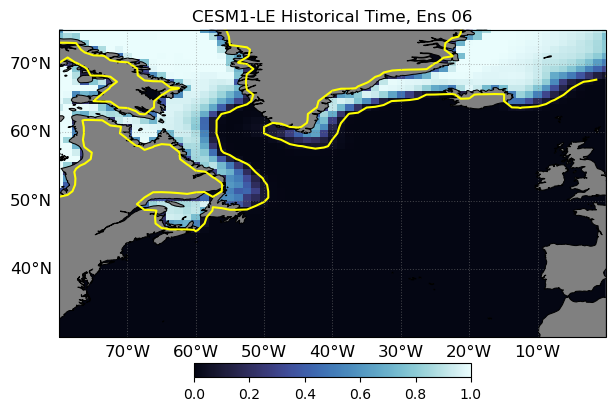

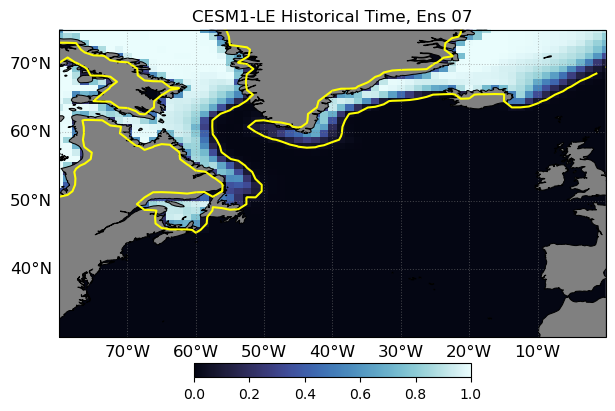

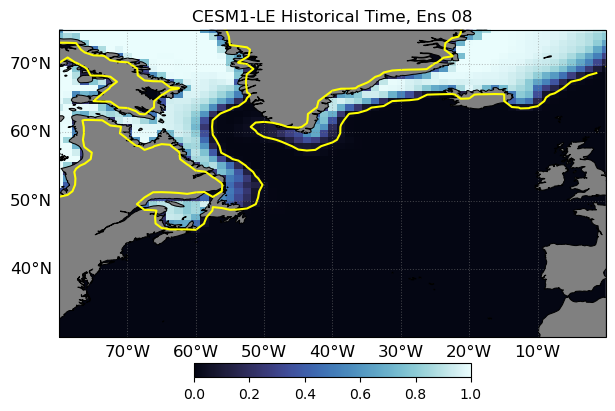

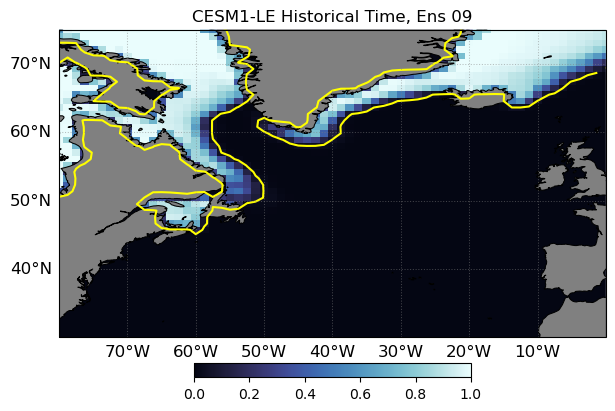

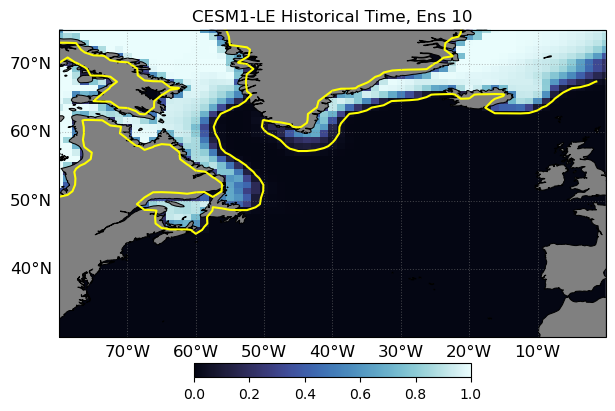

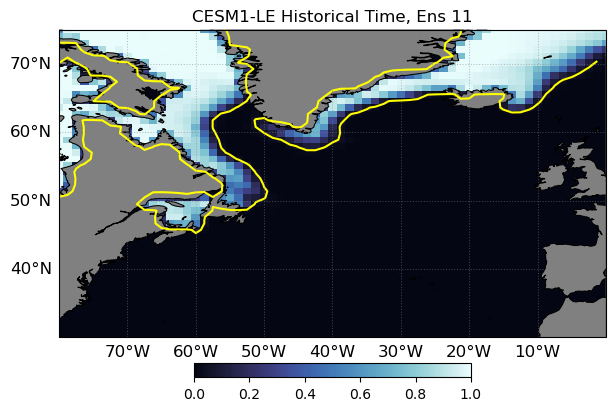

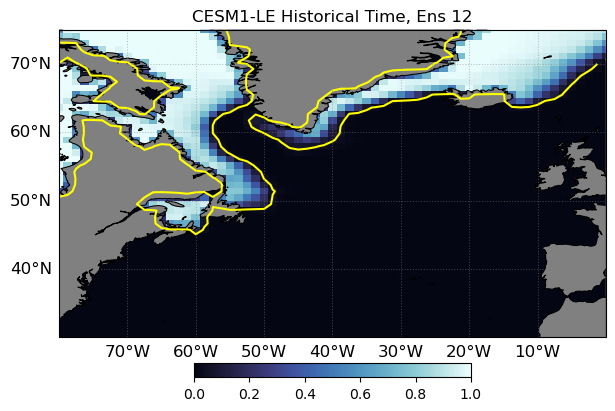

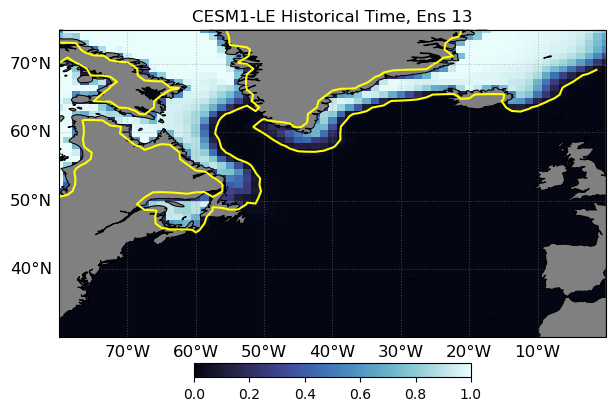

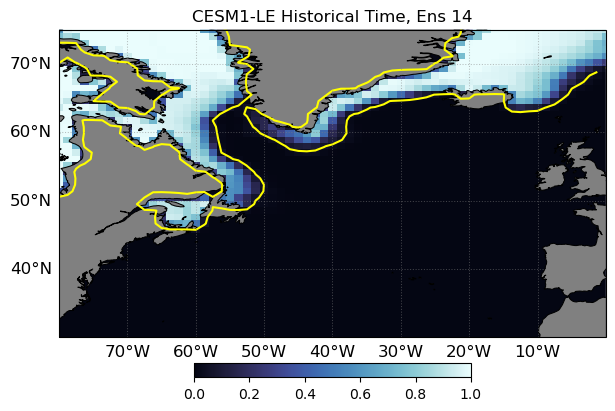

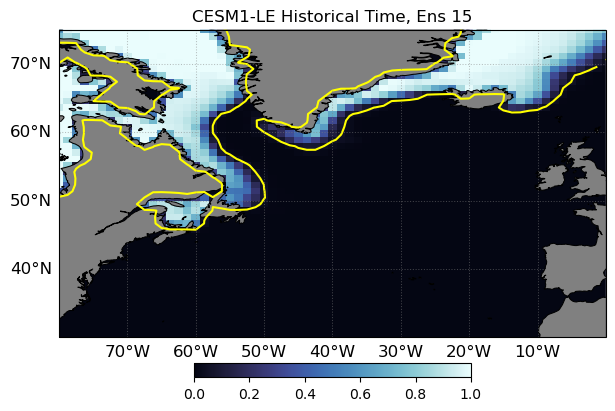

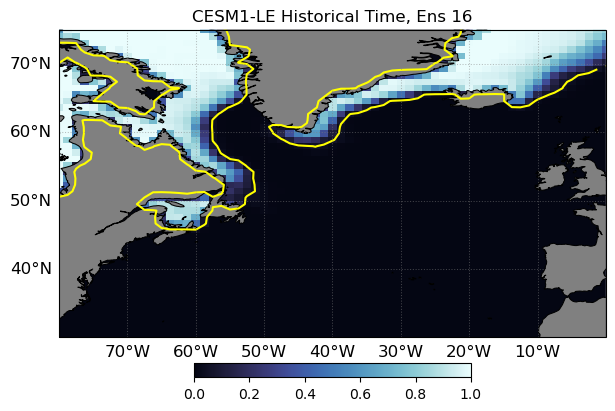

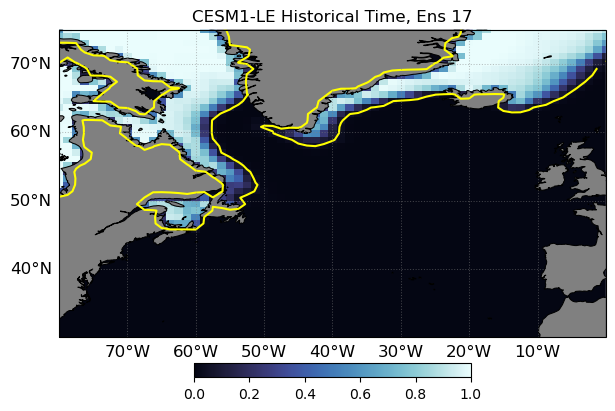

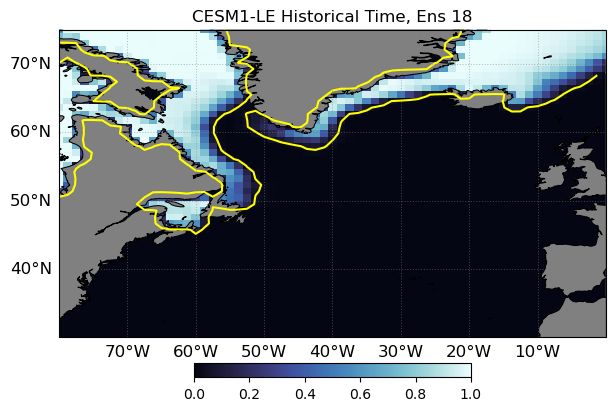

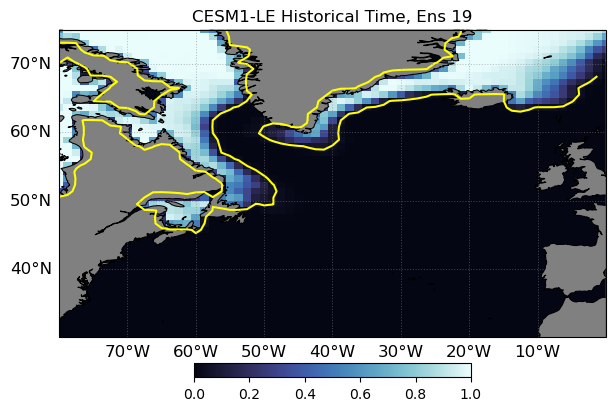

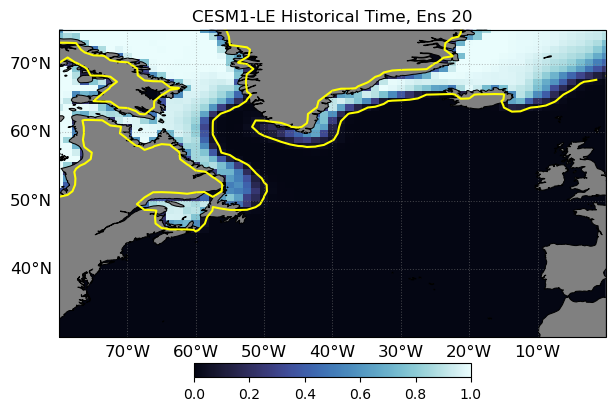

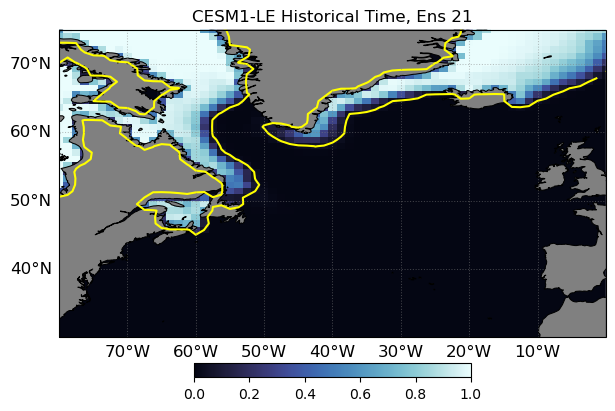

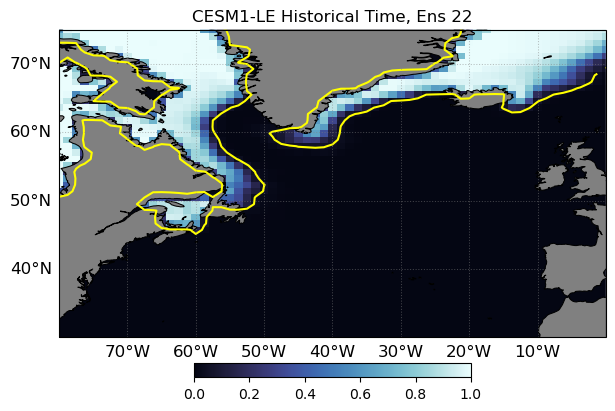

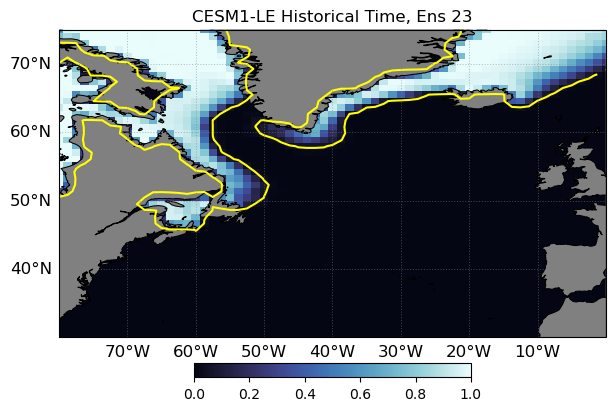

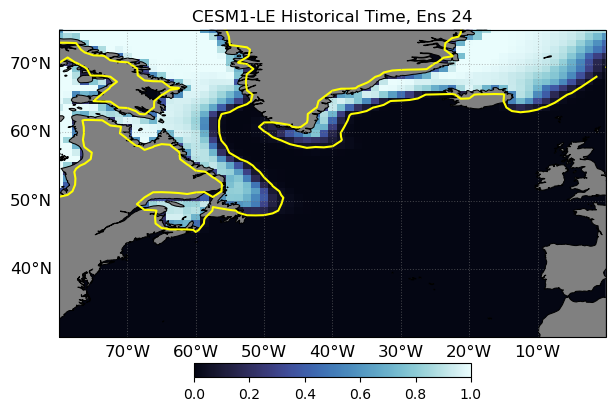

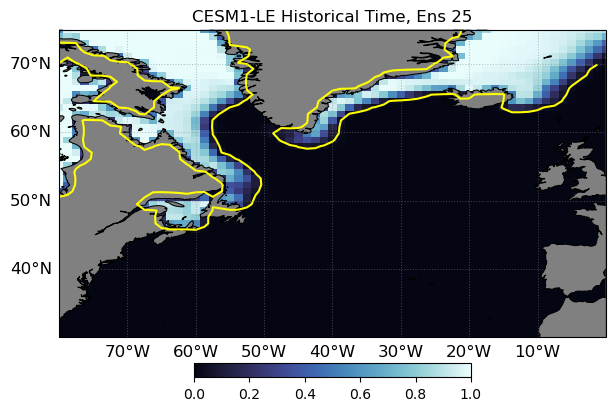

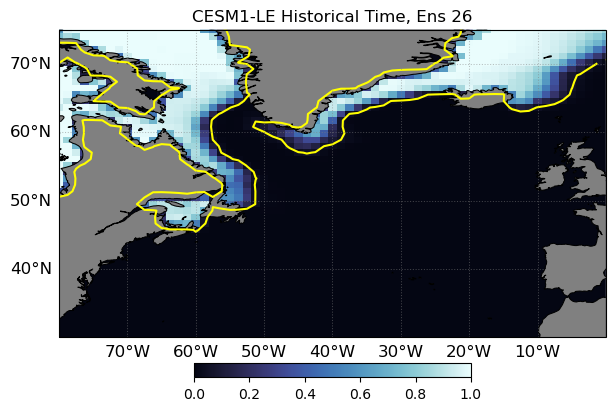

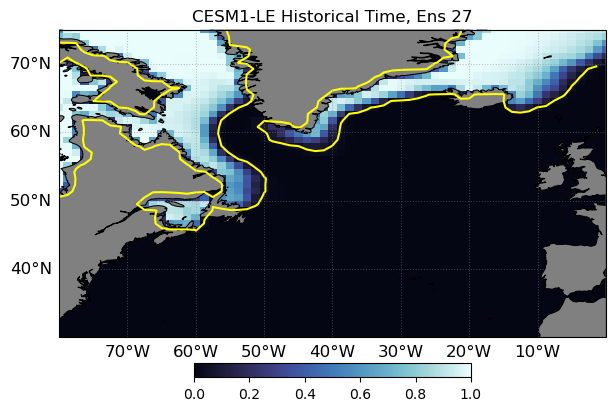

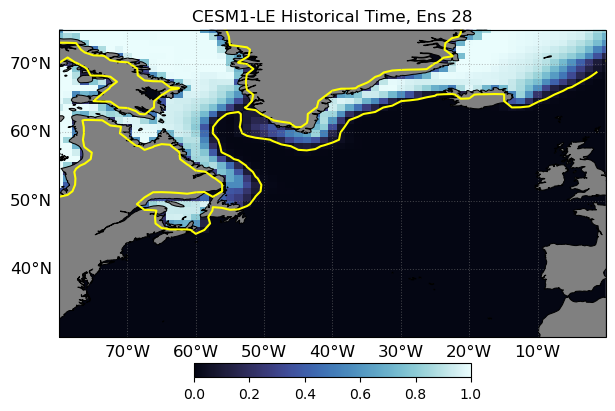

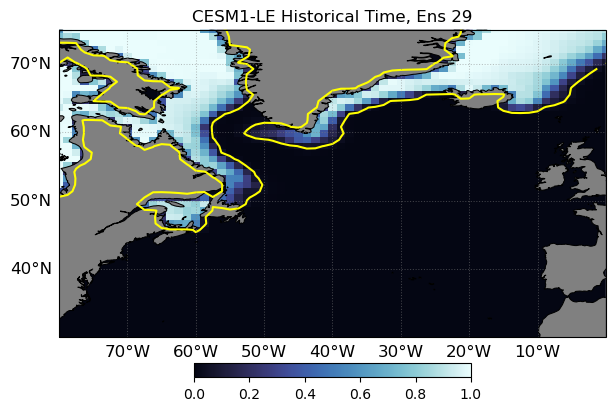

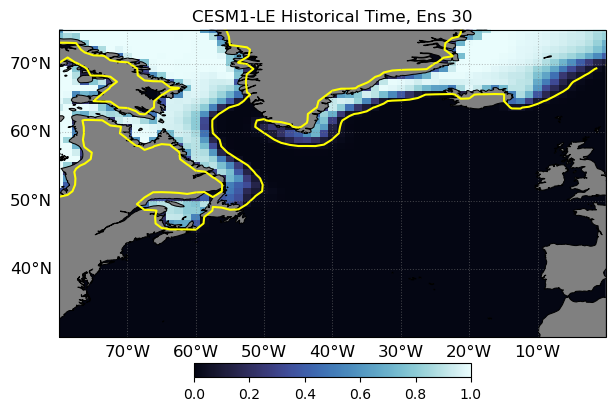

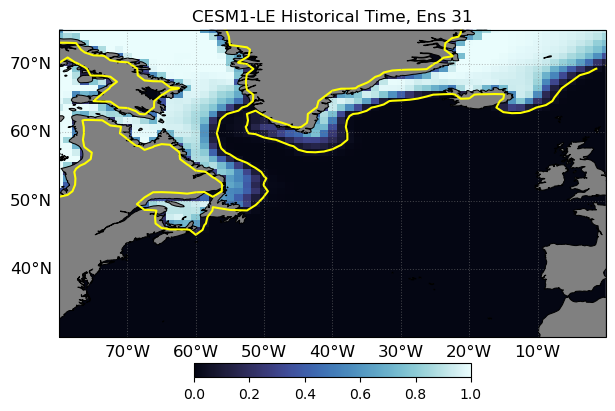

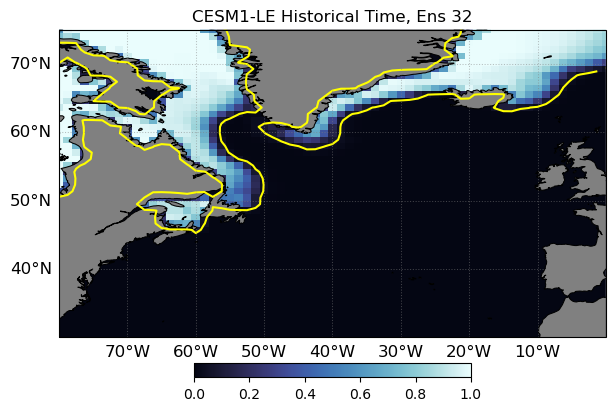

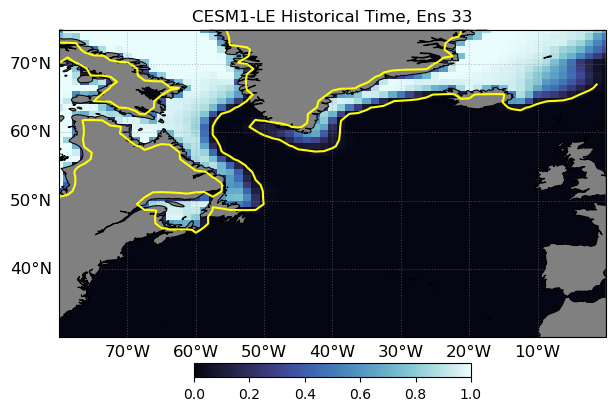

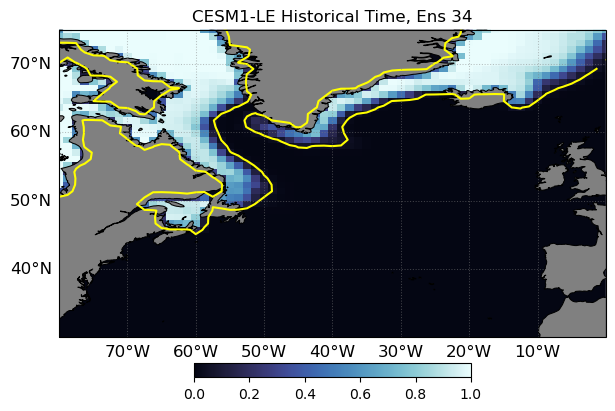

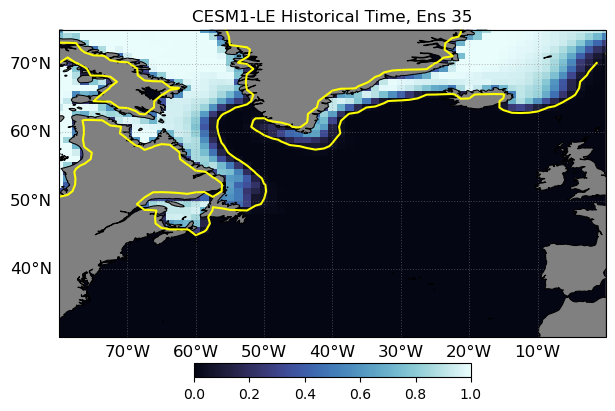

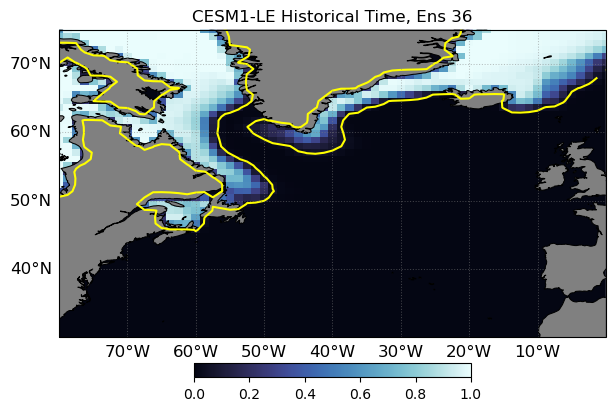

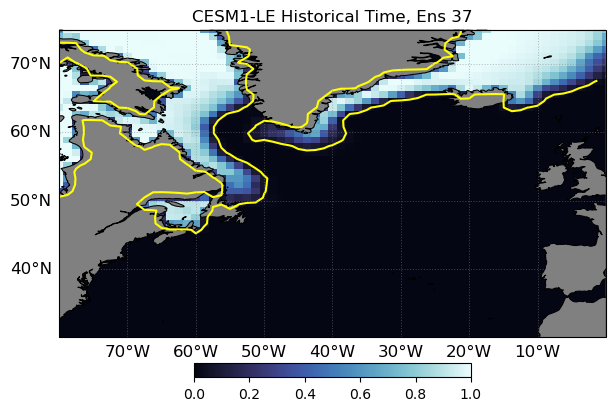

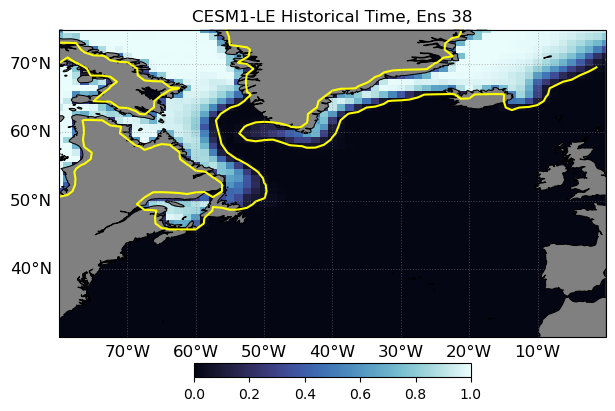

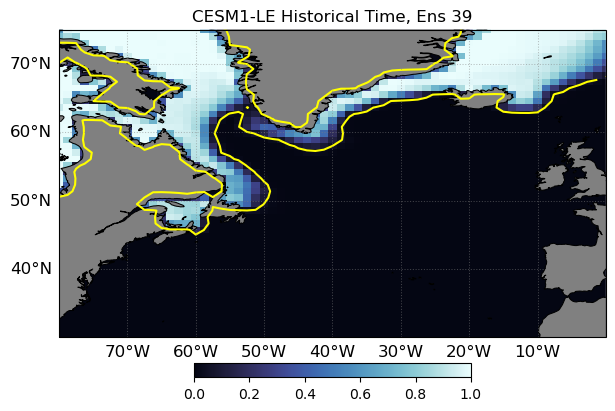

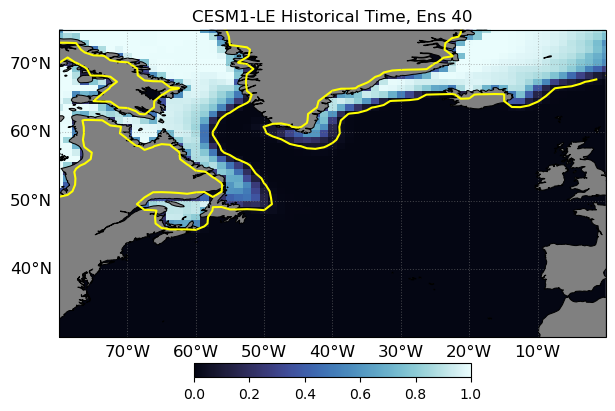

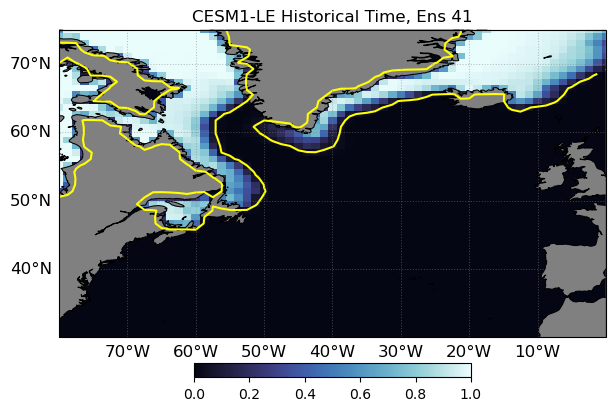

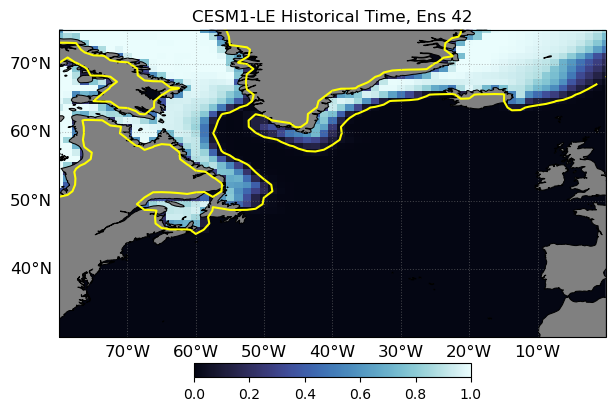

In [22]:


for e in range(42):
    fig,ax = plt.subplots(1,1,constrained_layout=True,figsize=(12,4),
                           subplot_kw={'projection':ccrs.PlateCarree()})
    blabel=[1,0,0,1]
    plot_ds = ds_mean.isel(time=e).ICEFRAC
    
    pcm = ax.pcolormesh(lon360,lat,plot_ds,vmin=0,vmax=1,cmap="cmo.ice")
    ax.contour(lon360,lat,plot_ds,levels=[.05],colors="yellow")
    ax.set_title("CESM1-LE Historical Time, Ens %02i" % (e+1))
    ax.set_extent([-80,0,20,65])
    viz.add_coast_grid(ax,bbox=bbox_spg,fill_color="gray",blabels=blabel)
    fig.colorbar(pcm,ax=ax,orientation='horizontal',fraction=0.045,pad=0.01)
    savename = "%sIceFraction_EnsMax_CESM1_HTR_ENS%02i.png" % (figpath,e+1)
    plt.savefig(savename,dpi=150,bbox_inches="tight")


    
    


## Scrap

In [191]:
# Make  mesh grid
YY,XX = np.meshgrid(lat,lon180)

plt.pcolormesh(XX.T),plt.colorbar()

In [65]:
mmasks2[ii]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]])